#Downloading the Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


100%|██████████| 48.6k/48.6k [00:00<00:00, 61.8MB/s]

#Importing Required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gsv, cross_val_score as cvs
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc

#Coverting Dataset into a Dataframe to perform operations

In [7]:
df = pd.read_csv("/content/breast-cancer-dataset/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.drop('id', axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Data Splitting and Feature Scaling

In [17]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

scaler = ss()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Training an SVM

In [32]:
svm_linear = SVC(kernel = 'linear').fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = acc(y_test, y_pred_linear)
print("Accuracy with Linear Kernel:", round(accuracy_linear, 2))

svm_rbf = SVC(kernel = 'rbf').fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = acc(y_test, y_pred_rbf)
print("Accuracy with RBF Kernel:", round(accuracy_rbf, 2))

Accuracy with Linear Kernel: 0.96
Accuracy with RBF Kernel: 0.98


#Visualising Decision Boundaries

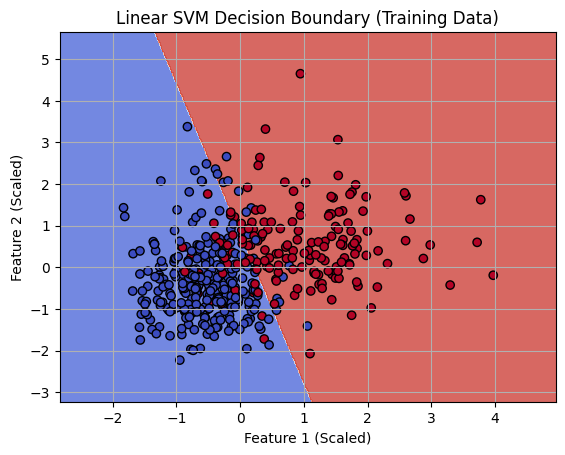

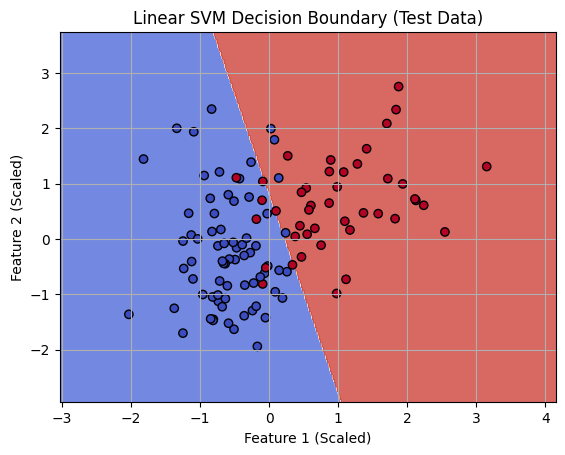

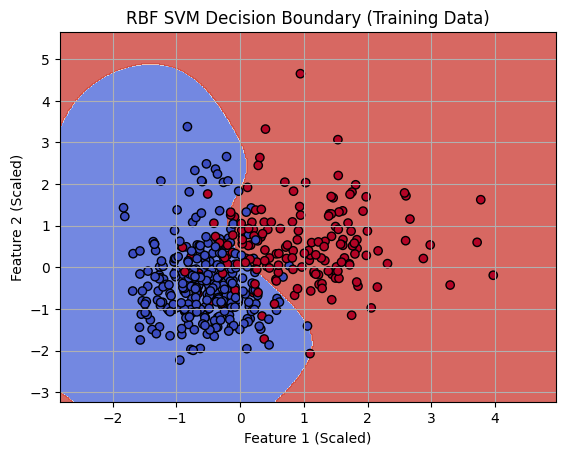

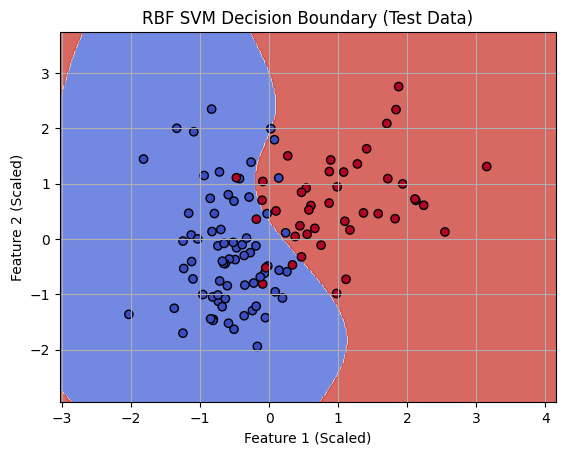

In [38]:
X_visual = X.iloc[:, :2].values
y_visual = y.values

scaler_visual = ss()
X_visual = scaler_visual.fit_transform(X_visual)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = tts(X_visual, y_visual, test_size = 0.2, random_state = 42)

svm_lin_vis = SVC(kernel = 'linear').fit(X_train_vis, y_train_vis)
svm_rbf_vis = SVC(kernel = 'rbf').fit(X_train_vis, y_train_vis)

def plot_bound(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, edgecolors = 'k')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.grid(True)
    plt.title(title)
    plt.show()

plot_bound(X_train_vis, y_train_vis, svm_lin_vis, 'Linear SVM Decision Boundary (Training Data)')
plot_bound(X_test_vis, y_test_vis, svm_lin_vis, 'Linear SVM Decision Boundary (Test Data)')

plot_bound(X_train_vis, y_train_vis, svm_rbf_vis, 'RBF SVM Decision Boundary (Training Data)')
plot_bound(X_test_vis, y_test_vis, svm_rbf_vis, 'RBF SVM Decision Boundary (Test Data)')

#Tuning Hyperparameters

In [42]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 'scale']}

gs_lin = gsv(SVC(kernel = 'linear'), param_grid, refit = True, verbose = 0, cv = 5)
gs_rbf = gsv(SVC(kernel = 'rbf'), param_grid, refit = True, verbose = 0, cv = 5)
gs_lin.fit(X_train, y_train)
gs_rbf.fit(X_train, y_train)

best_svm_lin = gs_lin.best_estimator_
best_svm_rbf = gs_rbf.best_estimator_
y_pred_best_lin = best_svm_lin.predict(X_test)
y_pred_best_rbf = best_svm_rbf.predict(X_test)

print("Best Parameters for Linear Kernel:", gs_lin.best_params_)
print("Accuracy with Tuned Linear Kernel:", round(acc(y_test, y_pred_best_lin), 2))
print("Best Parameters for RBF Kernel:", gs_rbf.best_params_)
print("Accuracy with Tuned RBF Kernel:", round(acc(y_test, y_pred_best_rbf), 2))

Best Parameters for Linear Kernel: {'C': 0.1, 'gamma': 1}
Accuracy with Tuned Linear Kernel: 0.98
Best Parameters for RBF Kernel: {'C': 1, 'gamma': 'scale'}
Accuracy with Tuned RBF Kernel: 0.98


#Evaluating performance through Cross-Validation Score

In [45]:
scores_lin = cvs(SVC(kernel = 'linear'), X, y, cv = 5)
print("Cross-validation scores for Linear SVM:", scores_lin)
print("Mean cross-validation accuracy for Linear SVM:", round(scores_lin.mean(), 2))

scores_rbf = cvs(SVC(kernel = 'rbf'), X, y, cv = 5)
print("\nCross-validation scores for RBF SVM:", scores_rbf)
print("Mean cross-validation accuracy for RBF SVM:", round(scores_rbf.mean(), 2))

scores_best_lin = cvs(best_svm_lin, X, y, cv = 5)
print("\nCross-validation scores for Tuned Linear SVM:", scores_best_lin)
print("Mean cross-validation accuracy for Tuned Linear SVM:", round(scores_best_lin.mean(), 2))

scores_best_rbf = cvs(best_svm_rbf, X, y, cv = 5)
print("\nCross-validation scores for Tuned RBF SVM:", scores_best_rbf)
print("Mean cross-validation accuracy for Tuned RBF SVM:", round(scores_best_rbf.mean(), 2))

Cross-validation scores for Linear SVM: [0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
Mean cross-validation accuracy for Linear SVM: 0.95

Cross-validation scores for RBF SVM: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean cross-validation accuracy for RBF SVM: 0.91

Cross-validation scores for Tuned Linear SVM: [0.93859649 0.94736842 0.98245614 0.92105263 0.95575221]
Mean cross-validation accuracy for Tuned Linear SVM: 0.95

Cross-validation scores for Tuned RBF SVM: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean cross-validation accuracy for Tuned RBF SVM: 0.91
